<a href="https://colab.research.google.com/github/Yilder02/SyS_2025-1/blob/main/Talleres_SyS/Taller_2_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Punto 1 – Comparación entre Series y Transformadas de Fourier + Algoritmo FFT

### 1. Serie de Fourier vs. Transformadas de Fourier

| Concepto                            | Serie de Fourier                                     | Transformada de Fourier                              |
|------------------------------------|------------------------------------------------------|------------------------------------------------------|
| **Tipo de señal**                  | Periódica                                            | Aperiodica                                           |
| **Dominio**                        | Tiempo continuo y discreto                           | Tiempo continuo (FT), tiempo discreto (DTFT, DFT)    |
| **Espectro**                       | Discreto (solo ciertas frecuencias armónicas)        | Continuo (FT, DTFT) o discreto (DFT)                 |
| **Tipos de serie**                 | Trigonométrica, exponencial y compacta               | No aplica                                            |
| **Representación**                 | Suma infinita de senos y cosenos (o exponenciales)   | Integral (FT), suma infinita (DTFT), suma finita (DFT) |
| **Aplicaciones**                  | Señales periódicas (sistemas eléctricos, vibraciones)| Análisis espectral, procesamiento de señales         |

---

### 2. Tipos de transformadas

#### a) **Transformada de Fourier (FT)**
- Se aplica a señales **continuas** y **aperiódicas**.
- Resultado: Espectro de frecuencia **continuo**.
- Fórmula:  
  $
  X(w) = \int_{-\infty}^{\infty} x(t) e^{-j w t} dt
  $

#### b) **Transformada de Fourier en Tiempo Discreto (DTFT)**
- Se aplica a señales **discretas** en tiempo pero de **duración infinita**.
- Resultado: Espectro de frecuencia **continuo y periódico**.
- Fórmula:  
  $
  X(e^{j\omega}) = \sum_{n=-\infty}^{\infty} x[n] e^{-j \omega n}
  $

#### c) **Transformada Discreta de Fourier (DFT)**
- Se aplica a señales **discretas y de duración finita**.
- Resultado: Espectro **discreto y periódico**.
- Fórmula:  
  $
  X[k] = \sum_{n=0}^{N-1} x[n] e^{-j \frac{2\pi}{N}kn}
  $

---

### 3. Combinaciones de señal y espectro

| Tipo de señal       | Espectro       | Ejemplo de transformada |
|---------------------|----------------|--------------------------|
| Continua en tiempo  | Continua       | Fourier (FT)             |
| Discreta en tiempo  | Continua       | DTFT                     |
| Discreta en tiempo  | Discreta       | DFT                      |
| Continua en tiempo  | Discreta       | Serie de Fourier         |

---

### 4. Algoritmo Fast Fourier Transform (FFT)

#### ¿Qué es el FFT?
Es un algoritmo eficiente para calcular la DFT. Reduce drásticamente el número de operaciones necesarias de **O(N²)** (DFT directa) a **O(N log N)**.

#### Utilidad del FFT:
- Procesamiento de audio y video.
- Análisis espectral en tiempo real.
- Compresión de datos (como MP3, JPEG).
- Comunicaciones digitales.

#### ¿Cómo funciona el FFT?
- Divide la señal en partes más pequeñas (divide y vencerás).
- Se aplica la recursión a estas partes.
- Utiliza simetría y periodicidad para minimizar cálculos.

---

### 5. Comparación de costos computacionales

| Método | Número de operaciones |
|--------|------------------------|
| DFT    | \( O(N^2) \)           |
| FFT    | \( O(N \log N) \)      |

---

### Conclusión

- La elección entre serie y transformada de Fourier depende del tipo de señal (periódica o aperiodica).
- Las transformadas DTFT y DFT permiten trabajar con señales digitales.
- El algoritmo FFT es clave en aplicaciones modernas por su eficiencia computacional.


## Punto 2 – Cálculo de la Transformada de Fourier (Directa)

Se calculará la función de densidad espectral (transformada de Fourier) para las siguientes señales, usando SymPy:

a) $e^{-a|t|} $

b)  $cos(w_c t)$

c) $sin(w_s t)$

d) $f(t) \cos(w_c t)$

e) $e^{-a|t|} * f(t)$

---


In [ ]:
import sympy as sp
from sympy.integrals.transforms import fourier_transform
from sympy.abc import t, w, a, tau

# Define wc and ws as symbols
wc, ws = sp.symbols('wc ws')

sp.init_printing()

f1 = sp.exp(-a * sp.Abs(t))
F1 = fourier_transform(f1, t, w)
F1.simplify()

                ⎛ -a⋅│t│      ⎞
FourierTransform⎝ℯ      , t, w⎠

In [ ]:
f2 = sp.cos(wc * t)
F2 = fourier_transform(f2, t, w)
F2.simplify()

FourierTransform(cos(t⋅wc), t, w)

In [ ]:
f3 = sp.sin(ws * t)
F3 = fourier_transform(f3, t, w)
F3.simplify()

FourierTransform(sin(t⋅ws), t, w)

In [ ]:
f4 = sp.exp(-a * sp.Abs(t)) * sp.cos(wc * t)
F4 = fourier_transform(f4, t, w)
F4.simplify()

                ⎛ -a⋅│t│                ⎞
FourierTransform⎝ℯ      ⋅cos(t⋅wc), t, w⎠

In [ ]:
f_conv = sp.exp(-a * sp.Abs(tau))
g_conv = sp.exp(-a * sp.Abs(t - tau))

conv = sp.integrate(f_conv * g_conv, (tau, -sp.oo, sp.oo))
conv.simplify()



∞                        
⌠                        
⎮   a⋅(-│τ│ - │t - τ│)   
⎮  ℯ                   dτ
⌡                        
-∞                       

In [ ]:
F_conv = fourier_transform(conv, t, w)
F_conv.simplify()

                ⎛∞                              ⎞
                ⎜⌠                              ⎟
                ⎜⎮   -a⋅│τ│ - a⋅│t - τ│         ⎟
FourierTransform⎜⎮  ℯ                   dτ, t, w⎟
                ⎜⌡                              ⎟
                ⎝-∞                             ⎠

## Punto 3 – Aplicación de Propiedades de la Transformada de Fourier

Se resolverán las siguientes transformadas usando propiedades y no integración directa. Se usó de la tabla de propiedades y se verificará simbólicamente con `SymPy`.

Expresiones:

a) $\mathscr{F} \left\{ e^{-j w_1 t} \cos(w_c t) \right\}$

b) $\mathscr{F} \left\{ t u(t) \cos^2(w_c t) \right\} $

c) $\mathscr{F} \left\{ \frac{1}{(t^2 + 9)(t^2 + 4)} \right\}$

d) $\mathscr{F} \left\{ t^3 \right\}$

e) $\sum_{n=-\infty}^{\infty} \left( \frac{1}{a^2 + (t - nT)^2} \right)$


In [ ]:
import sympy as sp
from sympy.abc import t, w, a, T, n, tau
from sympy import Heaviside, cos, sin, exp, simplify, Eq, fourier_transform, Function, Sum, pi, oo, init_printing

init_printing()
# Define w1 as a symbol using sp.symbols()
w1 = sp.symbols('w1')

In [ ]:
f = cos(wc * t)
F = fourier_transform(f, t, w)
F_shifted = F.subs(w, w + w1)
display(Eq(Function('F_a')(w), simplify(F_shifted)))


Fₐ(w) = FourierTransform(cos(t⋅wc), t, w + w₁)

In [ ]:
u = Heaviside(t)
f_b = t * u * (1 + cos(2 * wc * t)) / 2
F_b = fourier_transform(f_b, t, w)
display(Eq(Function('F_b')(w), simplify(F_b)))


         FourierTransform(t⋅θ(t), t, w)   FourierTransform(t⋅cos(2⋅t⋅wc)⋅θ(t), ↪
F_b(w) = ────────────────────────────── + ──────────────────────────────────── ↪
                       2                                      2                ↪

↪  t, w)
↪ ──────
↪       

In [ ]:
f_c = 1 / ((t**2 + 9) * (t**2 + 4))
F_c = fourier_transform(f_c, t, w)
display(Eq(Function('F_c')(w), simplify(F_c)))


                         ⎛       1             ⎞
F_c(w) = FourierTransform⎜───────────────, t, w⎟
                         ⎜ 4       2           ⎟
                         ⎝t  + 13⋅t  + 36      ⎠

In [ ]:
f_d = t**3
F_d = fourier_transform(f_d, t, w)
display(Eq(Function('F_d')(w), simplify(F_d)))


                         ⎛ 3      ⎞
F_d(w) = FourierTransform⎝t , t, w⎠

In [ ]:
single_pulse = 1 / (a**2 + (t - n * T)**2)
series_sum = Sum(single_pulse, (n, -oo, oo))
display(Eq(Function('f_e')(t), series_sum))

# O si se desea calcular la transformada simbólica (aunque converge débilmente):
# F_e = fourier_transform(series_sum, t, w)
# display(F_e)


          ∞                    
         ____                  
         ╲                     
          ╲           1        
           ╲   ────────────────
fₑ(t) =    ╱    2             2
          ╱    a  + (-T⋅n + t) 
         ╱                     
         ‾‾‾‾                  
        n = -∞                 

## Punto 4 - Modulación por amplitud con detección coherente
* La modulación por amplitud (AM) es un proceso mediante el cual una señal de mensaje (baja frecuencia) modula la amplitud de una señal portadora (alta frecuencia). En la detección coherente, también conocida como demodulación coherente, se requiere una señal portadora en el receptor sincronizada en frecuencia y fase con la señal portadora original del transmisor. Esto permite recuperar la señal original multiplicando la señal AM por una copia de la portadora y aplicando un filtro pasa bajas.

Ingrese el índice de modulación (ka): 2


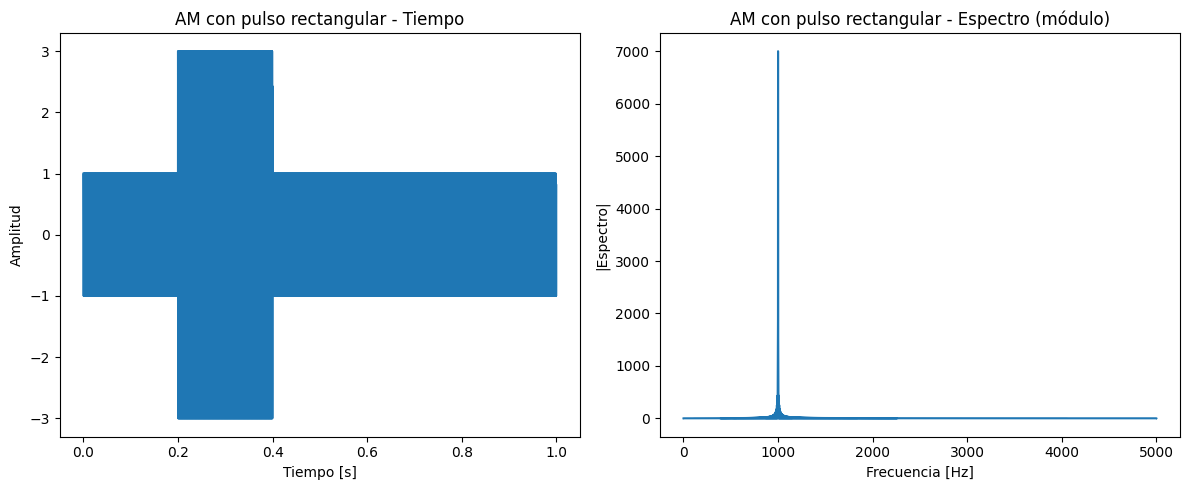

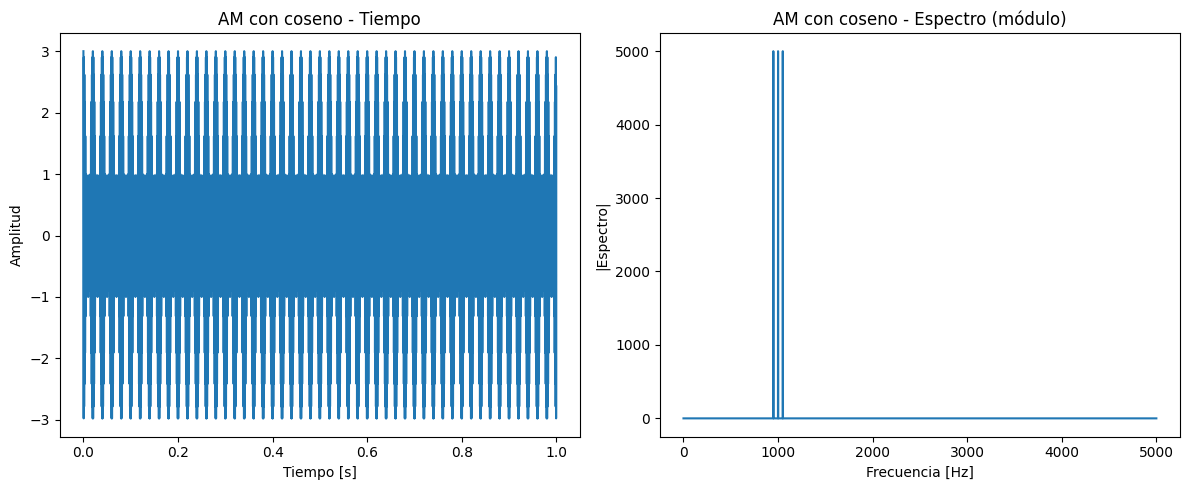

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

# Parámetros
fs = 10000  # Frecuencia de muestreo
t = np.linspace(0, 1, fs, endpoint=False)  # Tiempo
fc = 1000  # Frecuencia portadora
Ac = 1     # Amplitud de la portadora
ka = float(input("Ingrese el índice de modulación (ka): "))  # Índice de modulación

# Señal mensaje 1: pulso rectangular
m1 = np.zeros_like(t)
m1[(t >= 0.2) & (t < 0.4)] = 1  # pulso entre 0.2s y 0.4s

# Señal mensaje 2: coseno
fm = 50
m2 = np.cos(2 * np.pi * fm * t)

# Señales moduladas
s1 = Ac * (1 + ka * m1) * np.cos(2 * np.pi * fc * t)
s2 = Ac * (1 + ka * m2) * np.cos(2 * np.pi * fc * t)

# Función para graficar tiempo y espectro
def plot_signal_and_spectrum(t, signal, title):
    N = len(signal)
    yf = rfft(signal)
    xf = rfftfreq(N, 1/fs)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(t, signal)
    plt.title(f'{title} - Tiempo')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')

    plt.subplot(1, 2, 2)
    plt.plot(xf, np.abs(yf))
    plt.title(f'{title} - Espectro (módulo)')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('|Espectro|')
    plt.tight_layout()
    plt.show()

# Mostrar resultados
plot_signal_and_spectrum(t, s1, 'AM con pulso rectangular')
plot_signal_and_spectrum(t, s2, 'AM con coseno')
